# Explaining the fibertree traversal semantics

This notebook uses the fibertree emulator to explain the semantics of the fibertree code by looking at an analogous form of a uncompressed computations.

Here is an example of the progression of a Python uncompressed tensor calculations on (sparse tensors) for a series of calucation
sucessively traversing the iteration space using:

- range()
- enumerate()
- list comprehension and
- filtered list comprehension

Finally, the sequence culminates with the fibertree code operating on tensors with the same values.

Note this notebook assumes familiarity with the fibertree terminology, esprecially, `tensor`, `rank`, `coordinate` and `payload`.

First, include some libraries

In [7]:
# Begin - startup boilerplate code

import pkgutil

if 'fibertree' not in [pkg.name for pkg in pkgutil.iter_modules()]:
  !python3 -m pip  install git+https://github.com/Fibertree-project/fibertree-bootstrap --quiet
  !python3 -m pip  install  git+https://github.com/Fibertree-Project/fibertree --quiet

# End - startup boilerplate code

from fibertree_bootstrap import *

fibertree_bootstrap(style="tree", animation="movie")

Running bootstrap
The fibertree module is already installed and available to import


interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

## Define matrices

Here we intialize some tensors that will the used in the examples. The first tensor `A` is a matrix with ranks `K` and `M`. The second tensor is a vector `B` just with rank `K`.

In [2]:
# Define A as a shape (K x M) 2-tensor (matrix)

A = [ [5, 4, 3, 1],
      [3, 0, 0, 2],
      [0, 0, 0, 0],
      [4, 1, 0, 4]]

# Define B as a shape (K) 1-tensor (vector)

B = [ 4, 0, 1, 3 ]

# Define the rank shape values

M = len(A)
K = len(B)

## Traverse B

Perform a simple sum over a vector, which requires a traversal over the vector. This corresponds a traversal over the iteration space (and the computation of the the results) of this Einsum:

$$
Z = B_k
$$

### Iteration using `range()`

First do the traverse the iteration space by iterating over the range of coordinates in `B`. Notice how by convention we name the coordinates with the small letter corresponding to the name of the rank.

In [3]:
z = 0

for k in range(K):
    print(f"{k = }   {B[k] = }")
    z += B[k]

print(f"\n{z = }")

k = 0   B[k] = 4
k = 1   B[k] = 0
k = 2   B[k] = 1
k = 3   B[k] = 3

z = 8


### Iteration using `enumerate()`

Traverse the iteration space by interating over an enumeration of the list `B` using the `enumerate()` method. This will return a series of `(coordinate, payload)` tuples. Notice how by convetion we name the leaf payload with the name of the tensor (in lowercase) followed by underscore `val`. Thus the variable `b_val` will hold the values of the elements of the tensor `B`.

In [4]:
z = 0

for k, b_val in enumerate(B):
    print(f"{k = }   {b_val = }")
    z += b_val

print(f"\n{z = }")

k = 0   b_val = 4
k = 1   b_val = 0
k = 2   b_val = 1
k = 3   b_val = 3

z = 8


### Interation using list comprehensions

Now traverse the iteration space by interating over series of `(coorinate, payload)` tuples created with a list comprehension

In [5]:
z = 0

for k, b_val in [ (k, B[k]) for k in range(K)]:
    print(f"{k = }   {b_val = }")
    z += b_val

print(f"\n{z = }")

k = 0   b_val = 4
k = 1   b_val = 0
k = 2   b_val = 1
k = 3   b_val = 3

z = 8


## Traverse A

Perform a simple sum over a matrix, which requires a traversal over the matrix. This corresponds a traversal over the iteration space (and the computation of the the results) of this Einsum:

$$
Z = A_{k,m}
$$

### Iteration using `range()`

First do the traverse the iteration space by iterating over the two dimensional range of coordinates in `A`

In [6]:
z = 0

for k in range(K):
    for m in range(M):
        print(f"{(k,m) = }  {A[k][m] = }")
        z += A[k][m]

print(f"\n{z = }")

(k,m) = (0, 0)  A[k][m] = 5
(k,m) = (0, 1)  A[k][m] = 4
(k,m) = (0, 2)  A[k][m] = 3
(k,m) = (0, 3)  A[k][m] = 1
(k,m) = (1, 0)  A[k][m] = 3
(k,m) = (1, 1)  A[k][m] = 0
(k,m) = (1, 2)  A[k][m] = 0
(k,m) = (1, 3)  A[k][m] = 2
(k,m) = (2, 0)  A[k][m] = 0
(k,m) = (2, 1)  A[k][m] = 0
(k,m) = (2, 2)  A[k][m] = 0
(k,m) = (2, 3)  A[k][m] = 0
(k,m) = (3, 0)  A[k][m] = 4
(k,m) = (3, 1)  A[k][m] = 1
(k,m) = (3, 2)  A[k][m] = 0
(k,m) = (3, 3)  A[k][m] = 4

z = 27


### Iteration using `enumerate()`

Traverse the iteration space by iterating over elements of the ranks of the matrix `A` using the `enumerate()` method. This will return a nested series of `(coordinate, payload)` tuples, where in the outer loop the payload is a vector and in the inner loop it is a value. When the payload is not a scalar value, it will always be a fiber. So we use a convention of naming the payload variable that is a reference to that fiber "\<tensor-name>_\<rank_name>". So the payload variable in the outer loop is `a_m`.

In [7]:
z = 0

for k, a_m in enumerate(A):
    for m, a_val in enumerate(a_m):
        print(f"{(k,m) = }  {a_val = }")
        z += a_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5
(k,m) = (0, 1)  a_val = 4
(k,m) = (0, 2)  a_val = 3
(k,m) = (0, 3)  a_val = 1
(k,m) = (1, 0)  a_val = 3
(k,m) = (1, 1)  a_val = 0
(k,m) = (1, 2)  a_val = 0
(k,m) = (1, 3)  a_val = 2
(k,m) = (2, 0)  a_val = 0
(k,m) = (2, 1)  a_val = 0
(k,m) = (2, 2)  a_val = 0
(k,m) = (2, 3)  a_val = 0
(k,m) = (3, 0)  a_val = 4
(k,m) = (3, 1)  a_val = 1
(k,m) = (3, 2)  a_val = 0
(k,m) = (3, 3)  a_val = 4

z = 27


### Interation using list comprehensions

Now traverse the iteration space by interating over series of (coorinate, payload) tuples created with a nested set of list comprehensions

In [8]:
z = 0

for k, a_m in [(k, A[k]) for k in range(K)]:
    for m, a_val in [(m, a_m[m]) for m in range(M)]:
        print(f"{(k,m) = }  {a_val = }")
        z += a_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5
(k,m) = (0, 1)  a_val = 4
(k,m) = (0, 2)  a_val = 3
(k,m) = (0, 3)  a_val = 1
(k,m) = (1, 0)  a_val = 3
(k,m) = (1, 1)  a_val = 0
(k,m) = (1, 2)  a_val = 0
(k,m) = (1, 3)  a_val = 2
(k,m) = (2, 0)  a_val = 0
(k,m) = (2, 1)  a_val = 0
(k,m) = (2, 2)  a_val = 0
(k,m) = (2, 3)  a_val = 0
(k,m) = (3, 0)  a_val = 4
(k,m) = (3, 1)  a_val = 1
(k,m) = (3, 2)  a_val = 0
(k,m) = (3, 3)  a_val = 4

z = 27


### Interation using **filtered** list comprehensions

Noting that we do not need to do any work when the payload at a `k` coordinate is empty (either the row of A is empty or the value of B is zero)
Thus, we can filter out those cases in the list comprehension.

In [9]:
z = 0

for k, a_m in [(k, A[k]) for k in range(K) if A[k].count(0) != K]:
    for m, a_val in [(m, a_m[m]) for m in range(M) if a_m[m] != 0]:
        print(f"{(k,m) = }  {a_val = }")
        z += a_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5
(k,m) = (0, 1)  a_val = 4
(k,m) = (0, 2)  a_val = 3
(k,m) = (0, 3)  a_val = 1
(k,m) = (1, 0)  a_val = 3
(k,m) = (1, 3)  a_val = 2
(k,m) = (3, 0)  a_val = 4
(k,m) = (3, 1)  a_val = 1
(k,m) = (3, 3)  a_val = 4

z = 27


## Multi-tensor calculation

Now we are going to do a multi-tensor calculation that includes some dot products as part of our computation. In specific, we calculate the following Einsum:

$$
Z = A_{k,m} \times B_{k}
$$

### Iteration using `range()`

In [10]:
z = 0

for k in range(K):
    for m in range(M):
        print(f"{(k,m) = }  {A[k][m] = } {B[k] = }")
        z += A[k][m] * B[k]

print(f"\n{z = }")

(k,m) = (0, 0)  A[k][m] = 5 B[k] = 4
(k,m) = (0, 1)  A[k][m] = 4 B[k] = 4
(k,m) = (0, 2)  A[k][m] = 3 B[k] = 4
(k,m) = (0, 3)  A[k][m] = 1 B[k] = 4
(k,m) = (1, 0)  A[k][m] = 3 B[k] = 0
(k,m) = (1, 1)  A[k][m] = 0 B[k] = 0
(k,m) = (1, 2)  A[k][m] = 0 B[k] = 0
(k,m) = (1, 3)  A[k][m] = 2 B[k] = 0
(k,m) = (2, 0)  A[k][m] = 0 B[k] = 1
(k,m) = (2, 1)  A[k][m] = 0 B[k] = 1
(k,m) = (2, 2)  A[k][m] = 0 B[k] = 1
(k,m) = (2, 3)  A[k][m] = 0 B[k] = 1
(k,m) = (3, 0)  A[k][m] = 4 B[k] = 3
(k,m) = (3, 1)  A[k][m] = 1 B[k] = 3
(k,m) = (3, 2)  A[k][m] = 0 B[k] = 3
(k,m) = (3, 3)  A[k][m] = 4 B[k] = 3

z = 79


### Iteration using `enumerate()`

Again we have two nested loops to traverse the iteration space. Notice, however, how in this calucalation we need to concurrently traverse both the `A` and `B` tensors. To accomplish this we use the `zip()` method. Note further that in the pair of payloads returned one value is a reference to a fiber (`a_m`) and the other is a leaf value (`b_val`)

In [11]:
z = 0

for k, (a_m, b_val) in enumerate(zip(A, B)):
    for m, a_val in enumerate(a_m):
        print(f"{(k,m) = }  {a_val = } {b_val = }")
        z += a_val * b_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5 b_val = 4
(k,m) = (0, 1)  a_val = 4 b_val = 4
(k,m) = (0, 2)  a_val = 3 b_val = 4
(k,m) = (0, 3)  a_val = 1 b_val = 4
(k,m) = (1, 0)  a_val = 3 b_val = 0
(k,m) = (1, 1)  a_val = 0 b_val = 0
(k,m) = (1, 2)  a_val = 0 b_val = 0
(k,m) = (1, 3)  a_val = 2 b_val = 0
(k,m) = (2, 0)  a_val = 0 b_val = 1
(k,m) = (2, 1)  a_val = 0 b_val = 1
(k,m) = (2, 2)  a_val = 0 b_val = 1
(k,m) = (2, 3)  a_val = 0 b_val = 1
(k,m) = (3, 0)  a_val = 4 b_val = 3
(k,m) = (3, 1)  a_val = 1 b_val = 3
(k,m) = (3, 2)  a_val = 0 b_val = 3
(k,m) = (3, 3)  a_val = 4 b_val = 3

z = 79


### Iteration using list comprehensions

Now we do the traversal using list comprehensions.

In [12]:
z = 0

for k, (a_m, b_val) in [(k, (A[k], B[k])) for k in range(K)]:
    for m, a_val in [(m, a_m[m]) for m in range(M)]:
        print(f"{(k,m) = }  {a_val = } {b_val = }")
        z += a_val * b_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5 b_val = 4
(k,m) = (0, 1)  a_val = 4 b_val = 4
(k,m) = (0, 2)  a_val = 3 b_val = 4
(k,m) = (0, 3)  a_val = 1 b_val = 4
(k,m) = (1, 0)  a_val = 3 b_val = 0
(k,m) = (1, 1)  a_val = 0 b_val = 0
(k,m) = (1, 2)  a_val = 0 b_val = 0
(k,m) = (1, 3)  a_val = 2 b_val = 0
(k,m) = (2, 0)  a_val = 0 b_val = 1
(k,m) = (2, 1)  a_val = 0 b_val = 1
(k,m) = (2, 2)  a_val = 0 b_val = 1
(k,m) = (2, 3)  a_val = 0 b_val = 1
(k,m) = (3, 0)  a_val = 4 b_val = 3
(k,m) = (3, 1)  a_val = 1 b_val = 3
(k,m) = (3, 2)  a_val = 0 b_val = 3
(k,m) = (3, 3)  a_val = 4 b_val = 3

z = 79


### Filtered List Comprehension

Noting that we do not need to do any work when the payload at a `k` coordinate is empty (either the row of A is empty or the value of B is zero)
Thus, we can filter out those cases in the list comprehension. We also filter out payloads of individual elements of `A` that are zero at a specific `m` coordinate.

In [13]:
z = 0

for k, (a_m, b_val) in [(k, (A[k], B[k])) for k in range(K) if A[k].count(0) != K and B[k] != 0]:
    for m, a_val in [(m, a_m[m]) for m in range(M) if A[m] != 0]:
        print(f"{(k,m) = }  {a_val = } {b_val = }")
        z += a_val * b_val

print(f"\n{z = }")

(k,m) = (0, 0)  a_val = 5 b_val = 4
(k,m) = (0, 1)  a_val = 4 b_val = 4
(k,m) = (0, 2)  a_val = 3 b_val = 4
(k,m) = (0, 3)  a_val = 1 b_val = 4
(k,m) = (3, 0)  a_val = 4 b_val = 3
(k,m) = (3, 1)  a_val = 1 b_val = 3
(k,m) = (3, 2)  a_val = 0 b_val = 3
(k,m) = (3, 3)  a_val = 4 b_val = 3

z = 79


## Fibertree-based multi-tensor computation

We will now perform the same computation $Z = A_{k,m} \times B_k$ using fibertree code

## Create Fibertree Input Tensors

Create fibertree instances of the `A` and `B` tensors with the same values are the original Python uncompressed arrays. Note that the tensors are sparse.


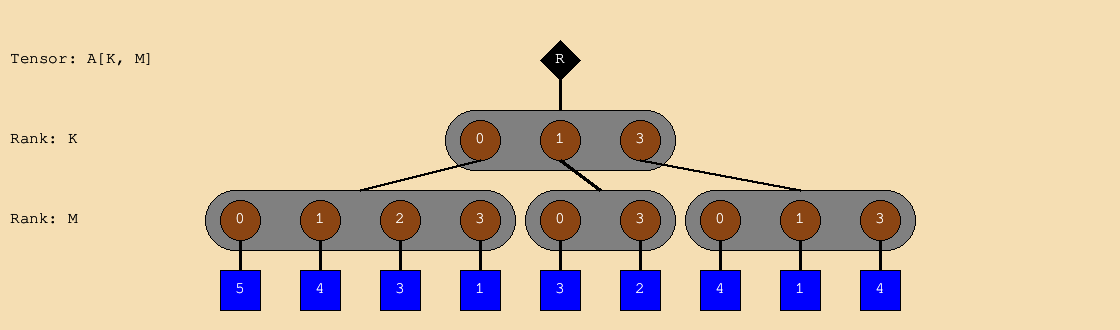

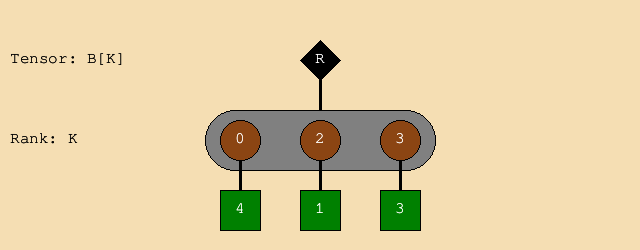

In [16]:
AF = Tensor.fromUncompressed(name="A", rank_ids=["K", "M"],  root=A, color="blue")
BF = Tensor.fromUncompressed(name="B", rank_ids=["K"], root=B, color="green")

displayTensor(AF)
print()
displayTensor(BF)

### Fibertree compution

Below is the fibree code for the computation. This has the following step:

- Create an empty 0-tensor for the result `Z`.
- Obtain the **root**s of each of the fibertrees. Note how for `A` and `B` they are fibers of the respective tensors, i.e., have names of the form "\<tensor-name>_\<rank-name>"
- In the outer loop, do the simultaneous traversal of the fibers from the `A` and `B` tensors.
  - Note that the results of the traversals of the top ranks of `A` and `B` deliver payloads that are a fiber and a scalar value, respectively
  - Note further how the intersection (&) does the filtering of cases when either a fiber of `A` is empty or a value of `B` is empty for each `k` coordinate
- In the inner loop, just do the traversal of an `m` fiber of `A`

(k,m) = (0, 0)  a_val = Payload(5) b_val = Payload(4)
(k,m) = (0, 1)  a_val = Payload(4) b_val = Payload(4)
(k,m) = (0, 2)  a_val = Payload(3) b_val = Payload(4)
(k,m) = (0, 3)  a_val = Payload(1) b_val = Payload(4)
(k,m) = (3, 0)  a_val = Payload(4) b_val = Payload(3)
(k,m) = (3, 1)  a_val = Payload(1) b_val = Payload(3)
(k,m) = (3, 3)  a_val = Payload(4) b_val = Payload(3)



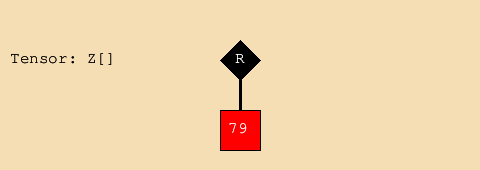

In [17]:
ZF = Tensor(name="Z", rank_ids=[])

a_k = AF.getRoot()
b_k = BF.getRoot()

z_ref = ZF.getRoot()

for k, (a_m, b_val) in a_k & b_k:
    for m, a_val in a_m:
        print(f"{(k,m) = }  {a_val = } {b_val = }")
        z_ref += a_val * b_val

print("")
displayTensor(ZF)

In [18]:
ZF = Tensor(name="Z", rank_ids=[])

z_ref = ZF.getRoot()

canvas = createCanvas(AF, BF, ZF)

for k, (a_m, b_val) in a_k & b_k:
    for m, a_val in a_m:
        z_ref += a_val * b_val
        print(f"{(k, m) = }  {a_val = } {b_val = }")

        canvas.addActivity((k,m), (k,), (0,))

print("")
displayCanvas(canvas)

Starting simulation
(k, m) = (0, 0)  a_val = Payload(5) b_val = Payload(4)
(k, m) = (0, 1)  a_val = Payload(4) b_val = Payload(4)
(k, m) = (0, 2)  a_val = Payload(3) b_val = Payload(4)
(k, m) = (0, 3)  a_val = Payload(1) b_val = Payload(4)
(k, m) = (3, 0)  a_val = Payload(4) b_val = Payload(3)
(k, m) = (3, 1)  a_val = Payload(1) b_val = Payload(3)
(k, m) = (3, 3)  a_val = Payload(4) b_val = Payload(3)

Finished simulation


Create individual tensor images for each cycle: 0it [00:00, ?it/s]

## Populate operator

A different type of co-iteration is one that mutates an output fiber by adding nonzero values into it based on the occupancy of another fiber. We refer to this as "populating" the fiber, and implement it with the << operator in Python.

Specifically the operator "z_m << a_m" returns values of the form:

```(m_coord, (z_ref, a_val)) ```

where m_coord is the current coordinate in m (as with intersection), a_val is the next value in a_m, and z_ref is a mutable reference to the value at that coordinate in Z. If that coordinate already existed, it will have the current value. Otherwise, it will be created with the tensor's default value (usually 0)

We can demonstrate this by changing the operation to be Matrix-Vector multiplication, represented by the following Einsum:

$$Z_m = A_{m,k} * B_k$$

In [19]:
Z = Tensor(name="Z", rank_ids=["M"])

z_m = Z.getRoot()

canvas = createCanvas(AF, BF, Z)

for k, (a_m, b_val) in a_k & b_k:
    for (m, (z_ref, a_val)) in z_m << a_m:
        z_ref += a_val * b_val
        print(f"{(k,m) = }  {z_ref = } {a_val = } {b_val = }")

        canvas.addActivity((k,m), (k,), (m,))

print("")
displayCanvas(canvas)

Starting simulation
(k,m) = (0, 0)  z_ref = Payload(20) a_val = Payload(5) b_val = Payload(4)
(k,m) = (0, 1)  z_ref = Payload(16) a_val = Payload(4) b_val = Payload(4)
(k,m) = (0, 2)  z_ref = Payload(12) a_val = Payload(3) b_val = Payload(4)
(k,m) = (0, 3)  z_ref = Payload(4) a_val = Payload(1) b_val = Payload(4)
(k,m) = (3, 0)  z_ref = Payload(32) a_val = Payload(4) b_val = Payload(3)
(k,m) = (3, 1)  z_ref = Payload(19) a_val = Payload(1) b_val = Payload(3)
(k,m) = (3, 3)  z_ref = Payload(16) a_val = Payload(4) b_val = Payload(3)

Finished simulation


Create individual tensor images for each cycle: 0it [00:00, ?it/s]

## Composing Co-iteration Operators

As all binary co-iteration operators return a new fiber, we can compose them in interesting ways to represent tensor algebra. For example, the elementwise multpilication Einsum is:

$$ Z_m = A_m * B_m $$

This involves both intersecting A and B and populating the corresponding coordinates of Z, which we can perform by composing the result of an intersection with a populate, as follows:

```Z_m << (A_m & B_m)```

As each operator returns an enumeration tuple, this would normally provide nested tuples with redundant coordinates, of the form:

```(m, (z_ref, (m_redundant, (a_val, b_val)))```

For convenience, fibertree removes these redundant coordinates and only returns the original, as follows:

```(m, (z_ref, (a_val, b_val)))```

We can put all this together in the following complete example.


In [17]:
Z = Tensor(name="Z", rank_ids=["M"])
A2 = [0,0,2,0,4,0,6,7]
A2F = Tensor.fromUncompressed(name="A", rank_ids=["M"],  root=A2, color="blue")
B2 = [0,17,34,0,68]
B2F = Tensor.fromUncompressed(name="B", rank_ids=["M"], root=B2, color="green")


a_m = A2F.getRoot()
b_m = B2F.getRoot()
z_m = Z.getRoot()

canvas = createCanvas(A2F, B2F, Z)

for (m, (z_ref, (a_val, b_val))) in z_m << (a_m & b_m):
    z_ref += a_val * b_val
    print(f"{(m) = }  {z_ref = } {a_val = } {b_val = }")

    canvas.addActivity((m), (m,), (m,))

print("")
displayCanvas(canvas)


Starting simulation
(m) = 2  z_ref = Payload(68) a_val = Payload(2) b_val = Payload(34)
(m) = 4  z_ref = Payload(272) a_val = Payload(4) b_val = Payload(68)

Finished simulation


Create individual tensor images for each cycle: 0it [00:00, ?it/s]

Paste individual tensor images into frame for each cycle:   0%|          | 0/4 [00:00<?, ?it/s]

Render video frame for each cycle:   0%|          | 0/4 [00:00<?, ?it/s]

## Testing area

For running alternative algorithms

In [18]:
# Parameters
input_size = 6
kernel_size = 3
stride = 1  # Try 2 for stride 2

# Input
input_vals = [[y * input_size + x + 1 for x in range(input_size)] for y in range(input_size)]
input_tensor = Tensor.fromUncompressed(name="Input", rank_ids=["Y", "X"], root=input_vals, color="blue")

# Kernel
kernel_vals = [[1 for _ in range(kernel_size)] for _ in range(kernel_size)]
kernel_tensor = Tensor.fromUncompressed(name="Kernel", rank_ids=["dY", "dX"], root=kernel_vals, color="green")

# Output tensor
output_tensor = Tensor(name="Output", rank_ids=["Y", "X"], color="red")

# Roots
in_root = input_tensor.getRoot()
ker_root = kernel_tensor.getRoot()
out_root = output_tensor.getRoot()

# Canvas
canvas = createCanvas(input_tensor, kernel_tensor, output_tensor)

# Output size
output_size = (input_size - kernel_size) // stride + 1

# Convolution loop
for oy in range(output_size):
    # Append row fiber for output
    output_row = Fiber()
    for ox in range(output_size):
        acc = 0
        for dy, ker_row in ker_root:
            for dx, k_val in ker_row:
                iy = oy * stride + dy
                ix = ox * stride + dx

                a_val = in_root[iy][ix]
                acc += k_val * a_val

                # Animate the contribution
                canvas.addActivity((iy, ix), (dy, dx), (oy, ox))

        output_row.append(ox, acc)
    out_root.append(oy, output_row)

# Show animation
displayCanvas(canvas)

Starting simulation
Finished simulation


Create individual tensor images for each cycle: 0it [00:00, ?it/s]

Paste individual tensor images into frame for each cycle:   0%|          | 0/146 [00:00<?, ?it/s]

Render video frame for each cycle:   0%|          | 0/146 [00:00<?, ?it/s]

In [25]:
# Parameters
input_size = 6
kernel_size = 3
stride = 1  # Try 2 for stride 2
pe_grid_size = 2  # Define the grid size for the parallel operations

# Generate input
input_vals = [[y * input_size + x + 1 for x in range(input_size)] for y in range(input_size)]
input_tensor = Tensor.fromUncompressed(name="Input", rank_ids=["Y", "X"], root=input_vals, color="blue")

# Generate kernel
kernel_vals = [[1 for _ in range(kernel_size)] for _ in range(kernel_size)]
kernel_tensor = Tensor.fromUncompressed(name="Kernel", rank_ids=["dY", "dX"], root=kernel_vals, color="green")

# Output tensor
output_tensor = Tensor(name="Output", rank_ids=["Y", "X"], color="red")

# Roots
in_root = input_tensor.getRoot()
ker_root = kernel_tensor.getRoot()
out_root = output_tensor.getRoot()

# Canvas
canvas = createCanvas(input_tensor, kernel_tensor, output_tensor)

# Output size
output_size = (input_size - kernel_size) // stride + 1

# Convolution loop with parallelism constraint
for oy in range(output_size):
    for ox in range(output_size):
        # Process each PE grid (parallel operation) individually
        acc = 0
        for dy, ker_row in ker_root:
            for dx, k_val in ker_row:
                iy = oy * stride + dy
                ix = ox * stride + dx

                a_val = in_root[iy][ix]
                acc += k_val * a_val

                # Animate the operation
                spacetime = (iy, ix, dy, dx)  # Assuming it's this format
                caption = f"op at ({oy},{ox})"
                canvas.addActivity(spacetime, caption)

        # Append the result (output index and accumulated value) in order
        out_root.append((oy, ox), acc)

# Show animation
displayCanvas(canvas)


Starting simulation
Finished simulation


Create individual tensor images for each cycle: 0it [00:00, ?it/s]

Paste individual tensor images into frame for each cycle:   0%|          | 0/146 [00:00<?, ?it/s]

Render video frame for each cycle:   0%|          | 0/146 [00:00<?, ?it/s]